In [2]:
import ee #GEE
import datetime
import ipyleaflet
import numpy as np
import matplotlib.pyplot as plt
import folium

In [3]:
# !pip3 install ipyleaflet

In [4]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

Initialize API (required)

In [5]:
ee.Initialize()

Date objects  
Reference: https://developers.google.com/earth-engine/python_install

In [797]:
# Convert ee.Date to client-side date
ee_date = ee.Date("2020-01-01")
py_date = datetime.datetime.utcfromtimestamp(ee_date.getInfo()["value"]/1000.0)
py_date

datetime.datetime(2020, 1, 1, 0, 0)

In [8]:
# Convert client-side date to ee.Date
py_date = datetime.datetime.utcnow()
ee_date = ee.Date(py_date)
ee_date

#### Specify area of interest

In [7]:
# area of interest has lat, lon of (-10.883689, -44.005800)
point_of_interest_lat, point_of_interest_lon = -10.883689, -44.005800
point_of_interest_len = 0.5
area_of_interest = ee.Geometry.Polygon([[point_of_interest_lon-point_of_interest_len, point_of_interest_lat-point_of_interest_len], 
                           [point_of_interest_lon-point_of_interest_len, point_of_interest_lat+point_of_interest_len], 
                           [point_of_interest_lon+point_of_interest_len, point_of_interest_lat+point_of_interest_len], 
                           [point_of_interest_lon+point_of_interest_len, point_of_interest_lat-point_of_interest_len]])

#### Display Landsat Satellite Image 

In [8]:
# Reference: https://github.com/google/earthengine-api/blob/master/python/examples/py/ImageCollection/filtered_composite.py
# Create a Landsat 7 composite for Spring of 2000, and filter by
# the bounds of the FeatureCollection.
landset_collection = (ee.ImageCollection('LANDSAT/LE07/C01/T1')
                      .filterDate(datetime.datetime(2018, 1, 1),
                                  datetime.datetime(2018, 12, 31))
                      .filter(ee.Filter.lt('CLOUD_COVER', 2))
                      #.filterMetadata("CLOUDY_PIXEL_PERCENTAGE","less_than",30)
                      .filterBounds(area_of_interest))

# landsat_img = landset_collection.median()
landsat_img = landset_collection.mosaic()

# Select the red, green and blue bands.
landsat_img_rgb = landsat_img.select('B3', 'B2', 'B1')

In [9]:
landsat_info = landset_collection.getInfo()

In [371]:
landsat_info.keys()

dict_keys(['id', 'properties', 'features', 'type', 'version', 'bands'])

In [372]:
landsat_info['id']

'LANDSAT/LE07/C01/T1'

In [373]:
landsat_info['properties']

{'date_range': [915148800000, 1587686400000],
 'description': '<p>Landsat 7 Collection 1 Tier 1 DN values, representing scaled, calibrated at-sensor radiance.</p><p>Landsat scenes with the highest available data quality\nare placed into Tier 1 and are considered suitable for time-series processing\nanalysis. Tier 1 includes Level-1 Precision Terrain (L1TP) processed data\nthat have well-characterized radiometry and are inter-calibrated across the\ndifferent Landsat sensors. The georegistration of Tier 1 scenes will be\nconsistent and within prescribed tolerances [<=12 m root mean square error\n(RMSE)]. All Tier 1 Landsat data can be considered consistent and\ninter-calibrated (regardless of sensor) across the full collection. See more information\n<a href="https://landsat.usgs.gov/landsat-collections">in the USGS docs.</a></p><p>For more information, see <a\nhref="https://www.usgs.gov/land-resources/nli/landsat/landsat-7-data-users-handbook">\nLandsat 7 Handbook</a></p><p><b>Revisit In

In [374]:
type(landsat_info['properties']['description'])

str

In [375]:
type(landsat_info['features'])

list

In [436]:
# each item in the list contains information (in dict) regarding an image
print('****************************{}****************************'.format(len(landset_collection.getInfo()['features'])))
for i in landsat_info['features']:
    print('====================================')
    print(type(i))
    print(i)

****************************30****************************
<class 'dict'>
{'type': 'Image', 'id': 'LANDSAT/LE07/C01/T1/LE07_219067_20180603', 'version': 1530454138105964, 'properties': {'LANDSAT_PRODUCT_ID': 'LE07_L1TP_219067_20180603_20180629_01_T1', 'GROUND_CONTROL_POINTS_MODEL': 115, 'DATUM': 'WGS84', 'SPACECRAFT_ID': 'LANDSAT_7', 'K1_CONSTANT_BAND_6_VCID_1': 666.0900268554688, 'GAIN_CHANGE_BAND_5': 'HH', 'FILE_DATE': 1530268273000, 'CORRECTION_BIAS_BAND_7': 'INTERNAL_CALIBRATION', 'RADIANCE_MULT_BAND_3': 0.621649980545044, 'SATURATION_BAND_1': 'Y', 'REFLECTIVE_LINES': 6971, 'GAIN_CHANGE_SCAN_BAND_6_VCID_2': 0, 'REFLECTANCE_MULT_BAND_4': 0.002925399923697114, 'GAIN_CHANGE_BAND_3': 'HH', 'RADIANCE_MULT_BAND_1': 0.7787399888038635, 'RADIANCE_MULT_BAND_6_VCID_2': 0.03720499947667122, 'GAIN_CHANGE_BAND_7': 'HH', 'CORRECTION_BIAS_BAND_6_VCID_1': 'INTERNAL_CALIBRATION', 'RADIANCE_MULT_BAND_6_VCID_1': 0.06708700209856033, 'GAIN_CHANGE_SCAN_BAND_1': 0, 'system:time_start': 1528030840980, 'G

In [377]:
landsat_info['type']

'ImageCollection'

In [378]:
landsat_info['bands']

[]

In [11]:
test_image = ee.Image(landset_collection.first())
test_image.getInfo()['properties'].keys()

dict_keys(['SATURATION_BAND_2', 'GAIN_CHANGE_SCAN_BAND_8', 'CORRECTION_BIAS_BAND_1', 'SATURATION_BAND_8', 'DATE_ACQUIRED', 'THERMAL_LINES', 'GAIN_CHANGE_BAND_6_VCID_2', 'GEOMETRIC_RMSE_MODEL_Y', 'MAP_PROJECTION', 'GAIN_BAND_2', 'SATURATION_BAND_5', 'LANDSAT_SCENE_ID', 'GAIN_CHANGE_BAND_7', 'RADIANCE_MULT_BAND_7', 'REQUEST_ID', 'EARTH_SUN_DISTANCE', 'GRID_CELL_SIZE_THERMAL', 'GROUND_CONTROL_POINTS_VERSION', 'system:index', 'GAIN_CHANGE_BAND_6_VCID_1', 'REFLECTANCE_ADD_BAND_1', 'DATA_CATEGORY', 'google:registration_ratio', 'GAIN_CHANGE_SCAN_BAND_7', 'GROUND_CONTROL_POINTS_MODEL', 'GAIN_CHANGE_BAND_8', 'ELLIPSOID', 'GRID_CELL_SIZE_REFLECTIVE', 'GAIN_CHANGE_BAND_5', 'GAIN_CHANGE_SCAN_BAND_6_VCID_1', 'UTM_ZONE', 'K1_CONSTANT_BAND_6_VCID_2', 'RADIANCE_ADD_BAND_7', 'REFLECTIVE_LINES', 'CORRECTION_GAIN_BAND_6_VCID_2', 'CORRECTION_GAIN_BAND_7', 'RESAMPLING_OPTION', 'PANCHROMATIC_SAMPLES', 'REFLECTANCE_ADD_BAND_5', 'PROCESSING_SOFTWARE_VERSION', 'REFLECTANCE_ADD_BAND_3', 'REFLECTANCE_MULT_BAND_2

In [379]:
landsat_img.getInfo()

{'bands': [{'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0],
   'data_type': {'max': 255,
    'min': 0,
    'precision': 'int',
    'type': 'PixelType'},
   'id': 'B1'},
  {'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0],
   'data_type': {'max': 255,
    'min': 0,
    'precision': 'int',
    'type': 'PixelType'},
   'id': 'B2'},
  {'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0],
   'data_type': {'max': 255,
    'min': 0,
    'precision': 'int',
    'type': 'PixelType'},
   'id': 'B3'},
  {'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0],
   'data_type': {'max': 255,
    'min': 0,
    'precision': 'int',
    'type': 'PixelType'},
   'id': 'B4'},
  {'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0],
   'data_type': {'max': 255,
    'min': 0,
    'precision': 'int',
    'type': 'PixelType'},
   'id': 'B5'},
  {'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0],
   'data_type': {'max': 255,
    'min': 0,
    'precision': 'int',
 

In [96]:
# Reference: https://spatial.utk.edu/maps/ee-api-folium-setup.html
# Define a method for displaying Earth Engine image tiles on a folium map.
def add_ee_layer(self, ee_object, vis_params, name):
    
    try:    
        # display ee.Image()
        if isinstance(ee_object, ee.image.Image):    
            map_id_dict = ee.Image(ee_object).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
            ).add_to(self)
        # display ee.ImageCollection()
        elif isinstance(ee_object, ee.imagecollection.ImageCollection):    
            ee_object_new = ee_object.mosaic()
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
            ).add_to(self)
        # display ee.Geometry()
        elif isinstance(ee_object, ee.geometry.Geometry):    
            folium.GeoJson(
            data = ee_object.getInfo(),
            name = name,
            overlay = True,
            control = True
        ).add_to(self)
        # display ee.FeatureCollection()
        elif isinstance(ee_object, ee.featurecollection.FeatureCollection):  
            ee_object_new = ee.Image().paint(ee_object, 0, 2)
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
        ).add_to(self)
    
    except:
        print("Could not display {}".format(name))
    
# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

In [384]:
visParams = {'min':0, 'max':255, 'gamma':1}

# Create a folium map object.
myMap = folium.Map(location=[point_of_interest_lat, point_of_interest_lon], zoom_start=8)
# myMap = folium.Map(location=[37.0, -109.05], zoom_start=8)

# Add the elevation model to the map object.
myMap.add_ee_layer(landsat_img_rgb, visParams, name='LANDSAT')

# Add a layer control panel to the map.
myMap.add_child(folium.LayerControl())

There are ways to deal with small stripes in the Landsat satelllite image (which started occurring in 2003): https://www.linkedin.com/pulse/time-series-landsat-data-google-earth-engine-andrew-cutts/

#### Display Sentinel-2 Satellite Image

Level 1-C: COPERNICUS/S2 (https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2)  
The Sentinel-2 data contain 13 UINT16 spectral bands representing TOA reflectance scaled by 10000.

Level 2-A: COPERNICUS/S2_SR (https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR#description)  
The Sentinel-2 L2 data are downloaded from scihub. They were computed by running sen2cor. WARNING: ESA did not produce L2 data for all L1 assets, and earlier L2 coverage is not global.

In [12]:
s2_collection = (ee.ImageCollection('COPERNICUS/S2_SR')
                 .filterDate('2018-01-01', '2018-12-31')
                 .filterMetadata("CLOUDY_PIXEL_PERCENTAGE","less_than",5)
                 #.filter(ee.Filter.lt('CLOUD_COVER', 5))
                 .filterBounds(area_of_interest))

In [709]:
# print the number of images in the image collection
print(" number of image: ",s2_collection.size().getInfo())

 number of image:  8


In [731]:
# Get a list of band
s2_collection.first().bandNames().getInfo()

['B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B8A',
 'B9',
 'B11',
 'B12',
 'AOT',
 'WVP',
 'SCL',
 'TCI_R',
 'TCI_G',
 'TCI_B',
 'MSK_CLDPRB',
 'MSK_SNWPRB',
 'QA10',
 'QA20',
 'QA60']

In [710]:
s2_collection.getInfo()

{'bands': [],
 'features': [{'bands': [{'crs': 'EPSG:32723',
     'crs_transform': [60, 0, 499980, 0, -60, 8900020],
     'data_type': {'max': 65535,
      'min': 0,
      'precision': 'int',
      'type': 'PixelType'},
     'dimensions': [1830, 1830],
     'id': 'B1'},
    {'crs': 'EPSG:32723',
     'crs_transform': [10, 0, 499980, 0, -10, 8900020],
     'data_type': {'max': 65535,
      'min': 0,
      'precision': 'int',
      'type': 'PixelType'},
     'dimensions': [10980, 10980],
     'id': 'B2'},
    {'crs': 'EPSG:32723',
     'crs_transform': [10, 0, 499980, 0, -10, 8900020],
     'data_type': {'max': 65535,
      'min': 0,
      'precision': 'int',
      'type': 'PixelType'},
     'dimensions': [10980, 10980],
     'id': 'B3'},
    {'crs': 'EPSG:32723',
     'crs_transform': [10, 0, 499980, 0, -10, 8900020],
     'data_type': {'max': 65535,
      'min': 0,
      'precision': 'int',
      'type': 'PixelType'},
     'dimensions': [10980, 10980],
     'id': 'B4'},
    {'crs': 'EP

In [711]:
s2_collection.getInfo().keys()

dict_keys(['id', 'properties', 'features', 'type', 'version', 'bands'])

In [712]:
print('****************************{}****************************'.format(len(s2_collection.getInfo()['features'])))
for item in s2_collection.getInfo()['features']:
    print('====================================')
    print(type(item))
    print(item['bands'])

****************************8****************************
<class 'dict'>
[{'id': 'B1', 'crs_transform': [60, 0, 499980, 0, -60, 8900020], 'dimensions': [1830, 1830], 'data_type': {'type': 'PixelType', 'max': 65535, 'min': 0, 'precision': 'int'}, 'crs': 'EPSG:32723'}, {'id': 'B2', 'crs_transform': [10, 0, 499980, 0, -10, 8900020], 'dimensions': [10980, 10980], 'data_type': {'type': 'PixelType', 'max': 65535, 'min': 0, 'precision': 'int'}, 'crs': 'EPSG:32723'}, {'id': 'B3', 'crs_transform': [10, 0, 499980, 0, -10, 8900020], 'dimensions': [10980, 10980], 'data_type': {'type': 'PixelType', 'max': 65535, 'min': 0, 'precision': 'int'}, 'crs': 'EPSG:32723'}, {'id': 'B4', 'crs_transform': [10, 0, 499980, 0, -10, 8900020], 'dimensions': [10980, 10980], 'data_type': {'type': 'PixelType', 'max': 65535, 'min': 0, 'precision': 'int'}, 'crs': 'EPSG:32723'}, {'id': 'B5', 'crs_transform': [20, 0, 499980, 0, -20, 8900020], 'dimensions': [5490, 5490], 'data_type': {'type': 'PixelType', 'max': 65535, 'mi

In [713]:
s2_img = s2_collection.median()
# s2_img = s2_collection.mosaic()

# Select the red, green and blue bands.
# Reference on the band selected: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2
s2_img_rgb = s2_img.select('B4', 'B3', 'B2')

In [717]:
# Reference on 'max': https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2
#     .divide(10000) + max:0.3 seems to indicate max here should be 3000
visParams = {'min':0, 'max':3000, 'gamma':1}

# Create a folium map object.
myMap = folium.Map(location=[point_of_interest_lat, point_of_interest_lon], zoom_start=8)
# myMap = folium.Map(location=[37.0, -109.05], zoom_start=8)

# Add the elevation model to the map object.
myMap.add_ee_layer(s2_img_rgb, visParams, name='Sentinel-2')

# Add a layer control panel to the map.
myMap.add_child(folium.LayerControl())

#### Calculate NDVI => Convert EE to Numpy => Create a static plot

I have to reduce the area of interest because it exceeds user memory limit.

In [120]:
# area of interest has lat, lon of (-10.883689, -44.005800)
point_of_interest_lat, point_of_interest_lon = -10.883689, -44.005800
point_of_interest_len = 0.1

area_of_interest = (ee.Geometry.Polygon([[point_of_interest_lon-point_of_interest_len, point_of_interest_lat-point_of_interest_len], 
                           [point_of_interest_lon-point_of_interest_len, point_of_interest_lat+point_of_interest_len], 
                           [point_of_interest_lon+point_of_interest_len, point_of_interest_lat+point_of_interest_len], 
                           [point_of_interest_lon+point_of_interest_len, point_of_interest_lat-point_of_interest_len]]))

s2_collection = (ee.ImageCollection('COPERNICUS/S2')
                 .filterDate('2018-01-01', '2018-3-31')
                 .filterMetadata("CLOUDY_PIXEL_PERCENTAGE","less_than",10)
                 .filterBounds(area_of_interest)
                 .select(['B8', 'B4', 'B3', 'B2']))

print(" number of image: ",s2_collection.size().getInfo())

 number of image:  37


In [110]:
# Reference: https://mygeoblog.com/2019/08/21/google-earth-engine-to-numpy/
# perform any calculation on the image collection here
def anyFunction(img):
    # without copyProperties, image wouldn't have properties attributes
    # copyProperties borrowed from https://developers.google.com/earth-engine/ic_visualization
    ndvi = ee.Image(img.normalizedDifference(['B8', 'B4'])).rename(["ndvi"]).copyProperties(img, img.propertyNames())
    return ndvi
 
# export the latitude, longitude and array
def LatLonImg(img):
    img = img.addBands(ee.Image.pixelLonLat())
 
    # Scale reference: https://developers.google.com/earth-engine/reducers_reduce_region
    img = img.reduceRegion(reducer=ee.Reducer.toList(),\
                                        geometry=area_of_interest,\
                                        maxPixels=1e13,\
                                        scale=100);
 
    data = np.array((ee.Array(img.get("result")).getInfo()))
    lats = np.array((ee.Array(img.get("latitude")).getInfo()))
    lons = np.array((ee.Array(img.get("longitude")).getInfo()))
    return lats, lons, data
 
# covert the lat, lon and array into an image
def toImage(lats,lons,data):
 
    # get the unique coordinates
    uniqueLats = np.unique(lats)
    uniqueLons = np.unique(lons)
 
    # get number of columns and rows from coordinates
    ncols = len(uniqueLons)
    nrows = len(uniqueLats)
 
    # determine pixelsizes
    ys = uniqueLats[1] - uniqueLats[0]
    xs = uniqueLons[1] - uniqueLons[0]
 
    # create an array with dimensions of image
    arr = np.zeros([nrows, ncols], np.float32) #-9999
 
    # fill the array with values
    counter =0
    for y in range(0,len(arr),1):
        for x in range(0,len(arr[0]),1):
            if lats[counter] == uniqueLats[y] and lons[counter] == uniqueLons[x] and counter < len(lats)-1:
                counter+=1
                arr[len(uniqueLats)-1-y,x] = data[counter] # we start from lower left corner
    return arr


In [718]:
# map over the image collection
myCollection  = s2_collection.map(anyFunction)

In [686]:
# get the median
result = ee.Image(myCollection.median()).rename(['result'])

In [687]:
result.getInfo()

{'bands': [{'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0],
   'data_type': {'max': 1,
    'min': -1,
    'precision': 'float',
    'type': 'PixelType'},
   'id': 'result'}],
 'type': 'Image'}

In [688]:
# get the lon, lat and result as 1d array
lat, lon, data = LatLonImg(result)

In [689]:
data[:10]

array([0.69252795, 0.70464063, 0.64286715, 0.15802236, 0.1528295 ,
       0.10556309, 0.10244128, 0.62510967, 0.611453  , 0.67329592])

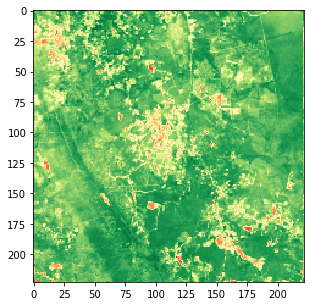

In [690]:
# 1d to 2d array
image  = toImage(lat,lon,data)
fig = plt.figure(figsize=(5, 5))
fig.set_facecolor('white')
# in case you want to plot the image
plt.imshow(image, cmap='RdYlGn')

plt.show()

#### Plot Sentinel-2 NDVI in an interactive map

In [719]:
s2_img = myCollection.median()
# s2_img = myCollection.mosaic()

# Select the red, green and blue bands.
s2_img_ndvi = s2_img.select('ndvi')

In [1]:
# Note: palette can be CSS-style color strings (https://en.wikipedia.org/wiki/Web_colors)
visParams = {'min':0, 'max':1, 'palette': ['red', 'yellow', 'green']}

# Create a folium map object.
myMap = folium.Map(location=[point_of_interest_lat, point_of_interest_lon], zoom_start=8)
# myMap = folium.Map(location=[37.0, -109.05], zoom_start=8)

# Add the elevation model to the map object.
myMap.add_ee_layer(s2_img_ndvi, visParams, name='Sentinel-2')

# Add a layer control panel to the map.
myMap.add_child(folium.LayerControl())

NameError: name 'folium' is not defined

More information on SAVI, EVI, et.c is here: https://eos.com/blog/6-spectral-indexes-on-top-of-ndvi-to-make-your-vegetation-analysis-complete/

In [728]:
# Reference: https://github.com/google/earthengine-api/blob/master/python/examples/py/ImageCollection/expression_map.py
def calc_NDVI(image):
    """A function to compute NDVI."""
    return image.expression('float(b("B8") - b("B4")) / (b("B8") + b("B4"))')


def calc_SAVI(image):
    """A function to compute Soil Adjusted Vegetation Index."""
    return ee.Image(0).expression(
      '(1 + L) * float(nir - red)/ (nir + red + L)',
      {
          'nir': image.select('B8'),
          'red': image.select('B4'),
          'L': 0.2
      })

visParams = {
    'min': 0,
    'max': 1,
    'palette': [
        'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163',
        '99B718', '74A901', '66A000', '529400', '3E8601',
        '207401', '056201', '004C00', '023B01', '012E01',
        '011D01', '011301'
    ]}

In [729]:
# Create a folium map object.
myMap = folium.Map(location=[point_of_interest_lat, point_of_interest_lon], zoom_start=8)
# myMap = folium.Map(location=[37.0, -109.05], zoom_start=8)

# Add the elevation model to the map object.
myMap.add_ee_layer(s2_collection.map(calc_NDVI).mean(), visParams, name='NDVI')
myMap.add_ee_layer(s2_collection.map(calc_SAVI).mean(), visParams, name='SAVI')

# Add a layer control panel to the map.
myMap.add_child(folium.LayerControl())

#### Sentinel-2 NDVI Times Series Animation

In [13]:
test_image = ee.Image(s2_collection.first())

In [68]:
test_image.getInfo().keys()

dict_keys(['bands', 'id', 'type', 'properties', 'version'])

In [69]:
test_image.date().format("YYYYMM").getInfo()

'201801'

In [70]:
# Inspired by https://developers.google.com/earth-engine/tutorials/community/modis-ndvi-time-series-animation
def calc_YYYYMM(img):
    return img.set('YYYYMM', img.date().format("YYYYMM"))

In [71]:
test_collection = s2_collection.map(calc_YYYYMM)

In [72]:
test_image = ee.Image(test_collection.first())

In [73]:
# The YYYYMMM field I just created can be found in the image's properties
test_image.getInfo()['properties']['YYYYMM']

'201801'

In [14]:
test_image.getInfo()['properties'].keys()

dict_keys(['SPACECRAFT_NAME', 'MEAN_INCIDENCE_ZENITH_ANGLE_B11', 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B8', 'WATER_VAPOUR_RETRIEVAL_ACCURACY', 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B8A', 'SOLAR_IRRADIANCE_B8', 'MEAN_INCIDENCE_ZENITH_ANGLE_B8A', 'system:asset_size', 'RADIOMETRIC_QUALITY', 'DATATAKE_IDENTIFIER', 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B9', 'MEAN_INCIDENCE_ZENITH_ANGLE_B1', 'MEAN_INCIDENCE_ZENITH_ANGLE_B10', 'MGRS_TILE', 'CLOUD_SHADOW_PERCENTAGE', 'DEGRADED_MSI_DATA_PERCENTAGE', 'SOLAR_IRRADIANCE_B3', 'MEAN_INCIDENCE_ZENITH_ANGLE_B7', 'SENSING_ORBIT_DIRECTION', 'SNOW_ICE_PERCENTAGE', 'MEDIUM_PROBA_CLOUDS_PERCENTAGE', 'DATATAKE_TYPE', 'NODATA_PIXEL_PERCENTAGE', 'SOLAR_IRRADIANCE_B7', 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B6', 'SENSING_ORBIT_NUMBER', 'MEAN_INCIDENCE_ZENITH_ANGLE_B8', 'PRODUCT_ID', 'MEAN_INCIDENCE_ZENITH_ANGLE_B9', 'GRANULE_ID', 'THIN_CIRRUS_PERCENTAGE', 'SOLAR_IRRADIANCE_B8A', 'RADIATIVE_TRANSFER_ACCURACY', 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B5', 'SATURATED_DEFECTIVE_PIXEL_PERCENTAGE', 'DATASTRI

In [105]:
print('****************************{}****************************'.format(len(s2_collection.getInfo()['features'])))
for item in test_collection.getInfo()['features']:
    print('====================================')
    print(type(item))
    print(item['properties']['YYYYMM'])

****************************24****************************
<class 'dict'>
201801
<class 'dict'>
201801
<class 'dict'>
201801
<class 'dict'>
201801
<class 'dict'>
201801
<class 'dict'>
201801
<class 'dict'>
201801
<class 'dict'>
201801
<class 'dict'>
201801
<class 'dict'>
201801
<class 'dict'>
201801
<class 'dict'>
201801
<class 'dict'>
201801
<class 'dict'>
201802
<class 'dict'>
201802
<class 'dict'>
201802
<class 'dict'>
201802
<class 'dict'>
201802
<class 'dict'>
201803
<class 'dict'>
201803
<class 'dict'>
201803
<class 'dict'>
201803
<class 'dict'>
201803
<class 'dict'>
201803


In [106]:
subset_collection = test_collection.filter(ee.Filter.eq('YYYYMM','201803'))

In [107]:
print('****************************{}****************************'.format(len(subset_collection.getInfo()['features'])))
for item in subset_collection.getInfo()['features']:
    print('====================================')
    print(type(item))
    print(item['properties']['YYYYMM'])

****************************6****************************
<class 'dict'>
201803
<class 'dict'>
201803
<class 'dict'>
201803
<class 'dict'>
201803
<class 'dict'>
201803
<class 'dict'>
201803


In [77]:
test_image = subset_collection.reduce(ee.Reducer.median())

In [78]:
test_image.getInfo().keys()

dict_keys(['bands', 'type'])

In [79]:
test_image = subset_collection.median()

In [80]:
test_image.getInfo().keys()

dict_keys(['bands', 'type'])

In [121]:
test_collection_ndvi = s2_collection.map(anyFunction).map(calc_YYYYMM)
subset1_collection = test_collection_ndvi.filter(ee.Filter.eq('YYYYMM','201801'))
subset2_collection = test_collection_ndvi.filter(ee.Filter.eq('YYYYMM','201802'))
subset3_collection = test_collection_ndvi.filter(ee.Filter.eq('YYYYMM','201803'))
test1_image = subset1_collection.median().select('ndvi')
test2_image = subset2_collection.median().select('ndvi')
test3_image = subset3_collection.median().select('ndvi')

In [122]:
subset2_collection.size().getInfo()

6

In [123]:
test3_image.getInfo()

{'bands': [{'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0],
   'data_type': {'max': 1,
    'min': -1,
    'precision': 'float',
    'type': 'PixelType'},
   'id': 'ndvi'}],
 'type': 'Image'}

In [124]:
collectionFromConstructor = ee.ImageCollection([test1_image, test2_image, test3_image])

In [125]:
# Note: palette can be CSS-style color strings (https://en.wikipedia.org/wiki/Web_colors)
visParams = {'min':0, 'max':1, 'palette': ['red', 'yellow', 'green']}

# Create a folium map object.
myMap = folium.Map(location=[point_of_interest_lat, point_of_interest_lon], zoom_start=8)
# myMap = folium.Map(location=[37.0, -109.05], zoom_start=8)

# Add the elevation model to the map object.
myMap.add_ee_layer(test1_image, visParams, name='201801')
myMap.add_ee_layer(test2_image, visParams, name='201802')
myMap.add_ee_layer(test3_image, visParams, name='201803')

# Add a layer control panel to the map.
myMap.add_child(folium.LayerControl())

In [86]:
visParams = {
  'min': 0.0,
  'max': 9000.0,
  'palette': [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301']}

def visualize_test(img):
    return img.visualize(visParams).copyProperties(img, img.propertyNames())

rgbVis = collectionFromConstructor.map(visualize_test)

In [87]:
gifParams = {
  'dimensions': 600,
  'crs': 'EPSG:3857',
  'framesPerSecond': 10,
  'bands':['B4', 'B3', 'B2']
}

print(rgbVis.getVideoThumbURL(gifParams))

EEException: Error in map(ID=1):
Image.visualize: Expected a string or list of strings for field 'bands'.

Good reference on `reducer`: https://colab.research.google.com/github/csaybar/EEwPython/blob/master/5_Reducer.ipynb#scrollTo=uT1SchrQNMOM

#### Train Tensorflow CNN with GEE data

https://github.com/gee-community/ee-tensorflow-notebooks/blob/master/landsat_qa_cnn/lc8_ee_qa_unet.ipynb

https://github.com/google/earthengine-api/blob/master/python/examples/ipynb/Earth_Engine_TensorFlow_AI_Platform.ipynb

https://github.com/google/earthengine-api/blob/master/python/examples/ipynb/Earth_Engine_TensorFlow_logistic_regression.ipynb

In [81]:
xy = ee.Geometry.Point([point_of_interest_lon, point_of_interest_lat])

In [94]:
# Create a Landsat 7 composite for Spring of 2000, and filter by
# the bounds of the FeatureCollection.
collection = (ee.ImageCollection('LANDSAT/LE07/C01/T1')
              .filterDate(datetime.datetime(2000, 4, 1),
                          datetime.datetime(2000, 7, 1))
              .filterBounds(area_of_interest))

# Select the median pixel.
image1 = collection.median()

# Select the red, green and blue bands.
image = image1.select('B3', 'B2', 'B1')

In [55]:
ee.Image(s2_image).getMapId(visParams)['tile_fetcher'].url_format

'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/maps/ae0ea453daa96765bc3e7e932b768ba2-d1dc2ffcb9cff8a86a7795569ee91c5e/tiles/{z}/{x}/{y}'

In [80]:
Image(url = s2.mosaic().getThumbUrl())

EEException: Expression evaluates to an image with no bands.

In [56]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


In [58]:
dem.gt(0)

In [59]:
dem.updateMask(dem.gt(0))

In [57]:
# Import the Image function from the IPython.display module. 
from IPython.display import Image

# Display a thumbnail of global elevation.
Image(url = dem.updateMask(dem.gt(0))
  .getThumbUrl({'min': 0, 'max': 4000, 'dimensions': 512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

In [63]:
# Display a thumbnail of global elevation.
Image(url = dem.getThumbUrl({'dimensions': 512}))

In [68]:
# Reference: https://spatial.utk.edu/maps/ee-api-folium-setup.html

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add custom basemaps
# basemaps['Google Maps'].add_to(my_map)
# basemaps['Google Satellite Hybrid'].add_to(my_map)

# Add the elevation model to the map object.
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Add fullscreen button
plugins.Fullscreen().add_to(my_map)

# Display the map.
display(my_map)